In [ ]:
#Dataset link - https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:

df=pd.read_csv("https://github.com/Sahil-Naik/BE-Programming/raw/main/LP-V(DL)/Assignment-1/housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [5]:
df.mean()

RM              6.240288
LSTAT          12.939632
PTRATIO        18.516564
MEDV       454342.944785
dtype: float64

In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape)

shape of scaled x train: (342, 3)
shape of scaled x test: (147, 3)


In [9]:
x_train_scaled[0]

array([0.4890849 , 0.35439003, 0.80851064])

In [10]:
x_train_scaled[0].shape

(3,)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [12]:
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100
342/342 [==============================] - 2s 4ms/step - loss: 205997457408.0000 - mae: 422468.8125 - val_loss: 112563077120.0000 - val_mae: 279881.7812
Epoch 2/100
342/342 [==============================] - 1s 3ms/step - loss: 42795683840.0000 - mae: 161539.6562 - val_loss: 43476254720.0000 - val_mae: 165569.7344
Epoch 3/100
342/342 [==============================] - 1s 3ms/step - loss: 32507774976.0000 - mae: 134481.1562 - val_loss: 39423086592.0000 - val_mae: 157336.0312
Epoch 4/100
342/342 [==============================] - 1s 3ms/step - loss: 29637175296.0000 - mae: 128972.3516 - val_loss: 35669479424.0000 - val_mae: 149179.1250
Epoch 5/100
342/342 [==============================] - 1s 3ms/step - loss: 26744320000.0000 - mae: 121580.2656 - val_loss: 32486197248.0000 - val_mae: 143360.7812
Epoch 6/100
342/342 [==============================] - 1s 4ms/step - loss: 24154099712.0000 - mae: 115202.7031 - val_loss: 28788168704.0000 - val_mae: 132288.6562
Epoch 7/100
342/342 

In [13]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 13)


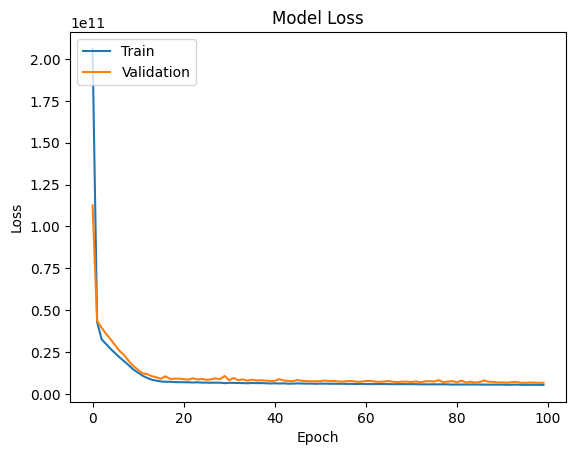

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()